<a href="https://colab.research.google.com/github/Aley7/bbc-haber-kaz-y-c-/blob/main/Bitirme_Projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install requests beautifulsoup4 pandas --quiet


In [8]:
%%writefile README.md
# BBC Türkçe Haber Başlıkları Kazıyıcı

## 📌 Projenin Amacı
Bu proje, Python kullanarak BBC Türkçe web sitesindeki haber başlıklarını otomatik olarak çekmek için geliştirilmiştir.
Requests ve BeautifulSoup kütüphaneleri kullanılmıştır.

## ⚙️ Kullanılan Teknolojiler
- Python 3.x
- requests
- BeautifulSoup4
- pandas

## 🚀 Nasıl Çalışır?
1. BBC Türkçe anasayfasına HTTP isteği gönderilir.
2. Gelen HTML kodu BeautifulSoup ile çözümlenir.
3. `<h3>` etiketli başlıklar tespit edilip metin olarak alınır.
4. Başlıklar pandas DataFrame'e aktarılır.
5. Sonuçlar `haber_basliklari.csv` dosyasına kaydedilir.

## ✨ Hazırlayan
Aleyna Yıldız
Techİstanbul Python Bootcamp – Bitirme Projesi
Kasım 2025


Overwriting README.md


In [9]:
%%writefile scraper.py
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

url = "https://www.bbc.com/turkce"

response = requests.get(url)
response.encoding = "utf-8"

soup = BeautifulSoup(response.text, "html.parser")

headlines = soup.find_all("h3")

data = []
for h in headlines:
    title = h.get_text(strip=True)
    if title:
        data.append({
            "Başlık": title,
            "Kaynak": "BBC Türkçe",
            "Tarih": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        })

df = pd.DataFrame(data)
df.to_csv("haber_basliklari.csv", index=False, encoding="utf-8-sig")

print("✅ Toplam", len(df), "haber başlığı kaydedildi.")
print("📁 Dosya: haber_basliklari.csv")


Overwriting scraper.py


In [10]:
!python3 scraper.py


✅ Toplam 55 haber başlığı kaydedildi.
📁 Dosya: haber_basliklari.csv


In [11]:
import pandas as pd
df = pd.read_csv("haber_basliklari.csv", encoding="utf-8-sig")
df.head(20)


,Başlık,Kaynak,Tarih
0,Kıbrıs'tan izlenimler: Rumlar Türklere ve adan...,BBC Türkçe,2025-11-13 08:22:30
1,Savcılığın 'İmamoğlu liderliğindeki örgütün' y...,BBC Türkçe,2025-11-13 08:22:30
2,'Deprem fırtınası': Balıkesir Sındırgı'da nede...,BBC Türkçe,2025-11-13 08:22:30
3,Türkiye ve Avustralya karşı karşıya geldi: COP...,BBC Türkçe,2025-11-13 08:22:30
4,'Altın kan': En nadir kan grubu 'Rh null' nede...,BBC Türkçe,2025-11-13 08:22:30
5,İBB iddianamesi: Başsavcılığın CHP hakkında Ya...,BBC Türkçe,2025-11-13 08:22:30
6,İBB iddianamesine İmamoğlu'dan ilk tepki: 'Dur...,BBC Türkçe,2025-11-13 08:22:30
7,"'Örgüt, eylemler, sistem': İBB iddianamesinde ...",BBC Türkçe,2025-11-13 08:22:30
8,İstanbul Cumhuriyet Başsavcısı Akın Gürlek kim...,BBC Türkçe,2025-11-13 08:22:30
9,Irak seçimleri: Başbakan Sudani'nin lideri old...,BBC Türkçe,2025-11-13 08:22:30


In [14]:
!pip install wordcloud matplotlib --quiet


In [17]:
!apt-get -qq install fonts-dejavu-core
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    collocations=False,
    font_path="/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
).generate(text)


Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 121235 files and directories currently installed.)
Preparing to unpack .../fonts-dejavu-core_2.37-2build1_all.deb ...
Unpacking fonts-dejavu-core (2.37-2build1) ...
Setting up fonts-dejavu-core (2.37-2build1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


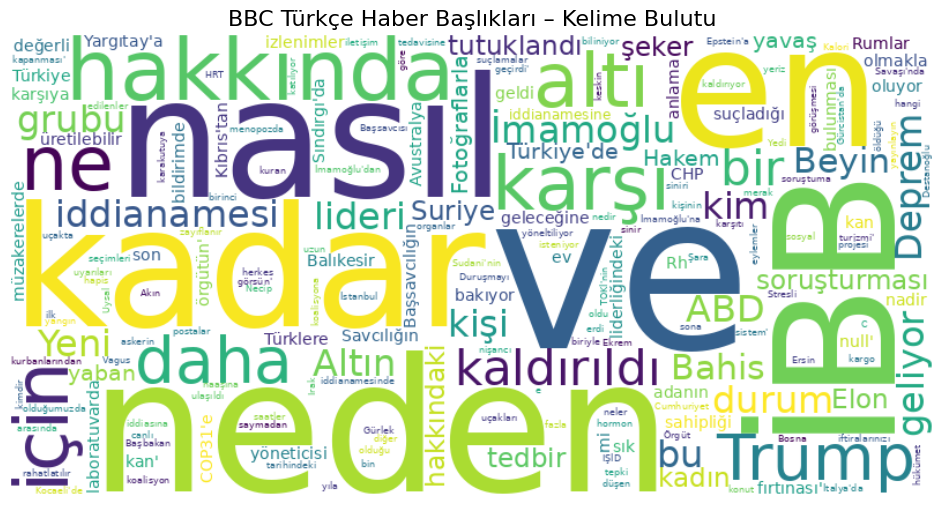

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("haber_basliklari.csv", encoding="utf-8-sig")

text = " ".join(df["Başlık"].astype(str))


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    collocations=False,
    font_path="/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
).generate(text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("BBC Türkçe Haber Başlıkları – Kelime Bulutu", fontsize=16)
plt.show()


In [19]:
from collections import Counter
import re

kelimeler = re.findall(r'\b\w+\b', text.lower())

kelimeler = [k for k in kelimeler if len(k) > 3]

counter = Counter(kelimeler)
en_cok = counter.most_common(10)

pd.DataFrame(en_cok, columns=["Kelime", "Frekans"])


,Kelime,Frekans
0,neden,5
1,nasıl,4
2,mamoğlu,4
3,kadar,4
4,hakkında,4
5,altı,3
6,türkiye,3
7,karşı,3
8,için,3
9,trump,3


In [26]:
import zipfile
import os
from google.colab import files
import pandas as pd
from collections import Counter


df = pd.read_csv("haber_basliklari.csv")
text = " ".join(df["Başlık"].astype(str))
words = text.split()
kelime_sayilari = Counter(words)


df_top = pd.DataFrame(kelime_sayilari.most_common(50), columns=["Kelime", "Frekans"])
df_top.to_csv("kelime_frekans.csv", index=False, encoding="utf-8-sig")


dosyalar = ["scraper.py", "haber_basliklari.csv", "wordcloud.png", "README.md", "kelime_frekans.csv"]


with zipfile.ZipFile("bitirme_projesi.zip", "w") as zipf:
    for dosya in dosyalar:
        if os.path.exists(dosya):
            zipf.write(dosya)
        else:
            print(f"⚠️ Dosya bulunamadı: {dosya}")

print("✅ Tüm dosyalar 'bitirme_projesi.zip' içine kaydedildi!")


files.download("bitirme_projesi.zip")


✅ Tüm dosyalar 'bitirme_projesi.zip' içine kaydedildi!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!git config --global user.name "Aley7"
!git config --global user.email "yildizaleyna408@gmail.com"


In [28]:
!git clone https://github.com/Aley7/bbc-haber-kaz-y-c-


Cloning into 'bbc-haber-kaz-y-c-'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [29]:
import shutil

dosyalar = ["scraper.py", "haber_basliklari.csv", "wordcloud.png", "README.md", "kelime_frekans.csv"]

for dosya in dosyalar:
    shutil.copy(dosya, "bbc-haber-kaz-y-c-/")
